# Google Stock Market prediction using LSTM 

In [36]:
# importing the needed libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('Google.csv') #reading the csv file 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [38]:
df = df[['Date','Close']] # extracted the date and time column for time series forecasting 

df['Date'].head() # we need in Date type format because we are performing Time Series forecasting 

0    2004-08-19
1    2004-08-20
2    2004-08-23
3    2004-08-24
4    2004-08-25
Name: Date, dtype: object

Now we want to set the date as the index for time series forecasting <br>

1. Change the dtype from object to Date 
2. Set the Date column as index 

In [39]:
df['Date'] = pd.to_datetime(df['Date'])  # here we use to_datetime change the data type to Datetime
df['Date'].head()

C:\Users\ARNAV\AppData\Local\Temp\ipykernel_17220\902245137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])  # here we use to_datetime change the data type to Datetime


0   2004-08-19
1   2004-08-20
2   2004-08-23
3   2004-08-24
4   2004-08-25
Name: Date, dtype: datetime64[ns]

In [40]:
df

,Date,Close
0,2004-08-19,50.220219
1,2004-08-20,54.209209
2,2004-08-23,54.754753
3,2004-08-24,52.487488
4,2004-08-25,53.053055
...,...,...
4426,2022-03-18,2722.510010
4427,2022-03-21,2722.030029
4428,2022-03-22,2797.360107
4429,2022-03-23,2765.510010


In [41]:
df.index = df.pop('Date')

In [42]:
df

,Close
Date,
2004-08-19,50.220219
2004-08-20,54.209209
2004-08-23,54.754753
2004-08-24,52.487488
2004-08-25,53.053055
...,...
2022-03-18,2722.510010
2022-03-21,2722.030029
2022-03-22,2797.360107


# Lets try to plot the dataset 

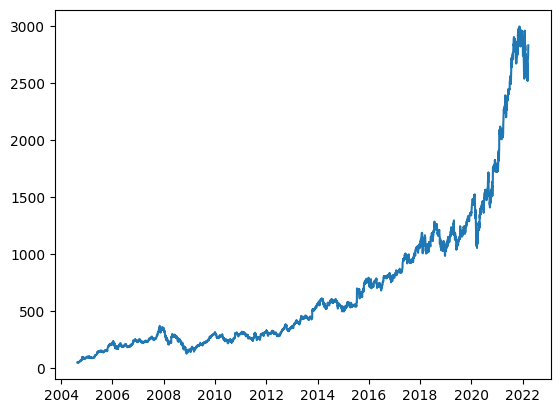

In [44]:
plt.plot(df.index, df['Close']) # plotting the index ie Date vs the Closing price of Google Stocks 